<a href="https://colab.research.google.com/github/orin00/colab/blob/main/240315_TFT%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d gyejr95/tft-match-data

 88% 20.0M/22.8M [00:01<00:00, 17.0MB/s]
100% 22.8M/22.8M [00:01<00:00, 13.2MB/s]


In [4]:
!unzip /content/tft-match-data.zip

Archive:  /content/tft-match-data.zip
  inflating: TFT_Challenger_MatchData.csv  
  inflating: TFT_Diamond_MatchData.csv  
  inflating: TFT_GrandMaster_MatchData.csv  
  inflating: TFT_Master_MatchData.csv  
  inflating: TFT_Platinum_MatchData.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TFT_Master_MatchData.csv')

In [6]:
df.describe()

,gameDuration,level,lastRound,Ranked,ingameDuration
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,2155.497472,7.841323,33.531157,4.499331,1876.467332
std,133.843352,0.771159,4.784822,2.291910,267.107052
min,181.108841,3.000000,5.000000,0.000000,178.951233
25%,2063.781738,7.000000,30.000000,2.000000,1705.329529
50%,2148.008301,8.000000,34.000000,4.000000,1900.402954
75%,2242.993652,8.000000,37.000000,6.000000,2063.158691
max,2738.779053,9.000000,48.000000,8.000000,2730.512695


In [7]:
df.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [8]:
df.shape

(79999, 8)

In [9]:
df.info()
# 8명의 플레이어가 동일하게 gameId를 가지고 있고, gameId가 게임의 승패에 영향을 미치지 않으므로 삭제한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          79999 non-null  object 
 1   gameDuration    79999 non-null  float64
 2   level           79999 non-null  int64  
 3   lastRound       79999 non-null  int64  
 4   Ranked          79999 non-null  int64  
 5   ingameDuration  79999 non-null  float64
 6   combination     79999 non-null  object 
 7   champion        79999 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ MB


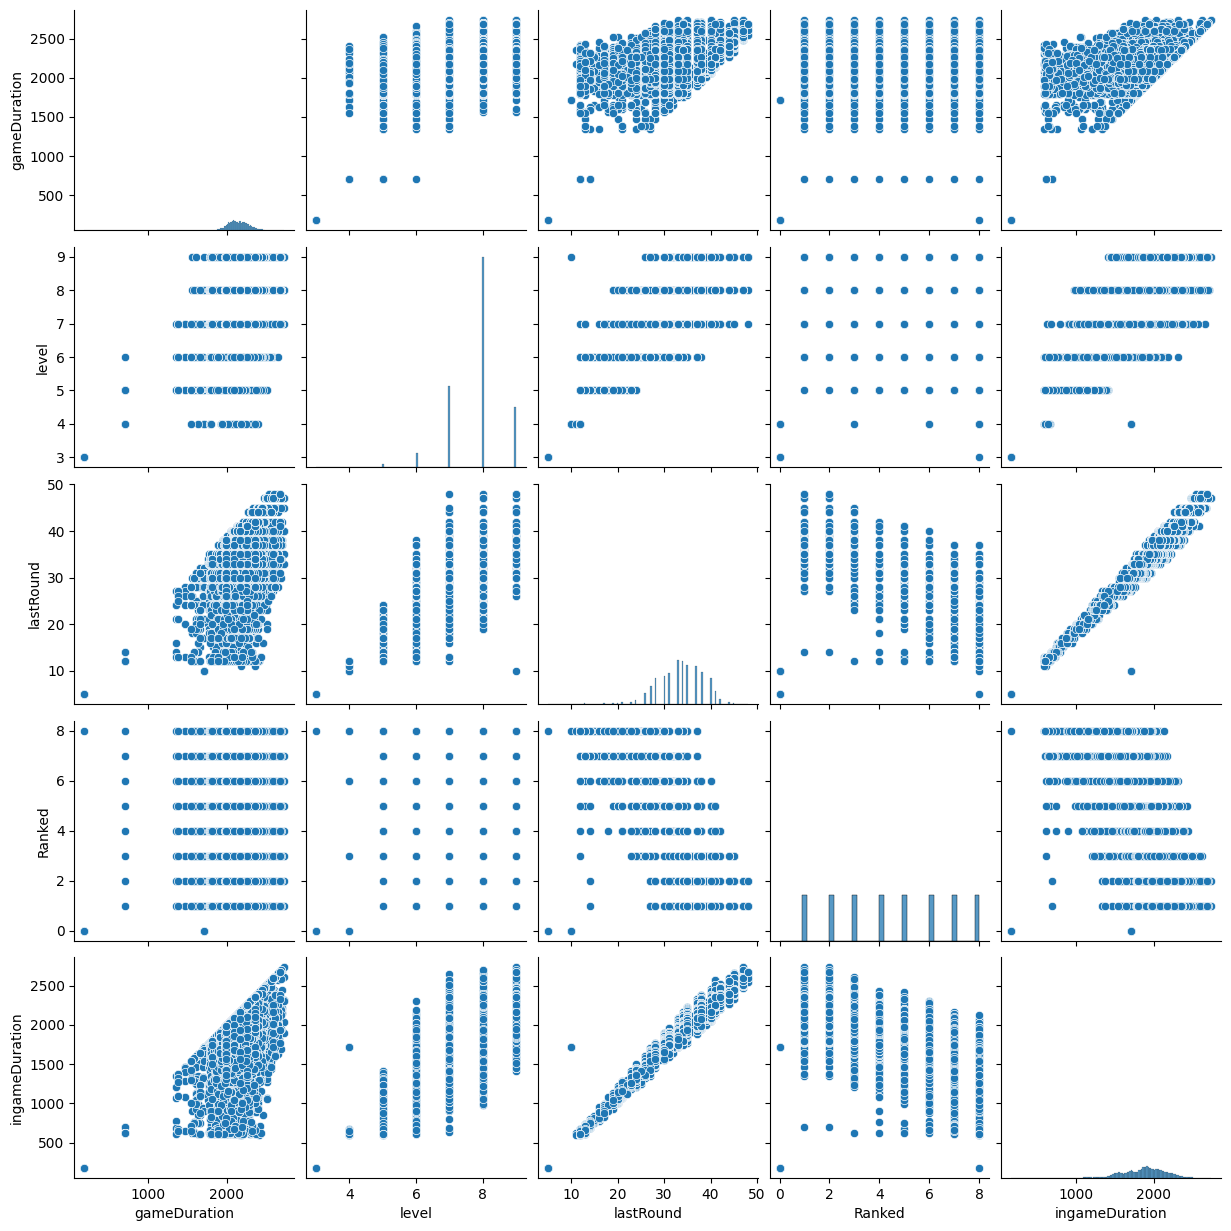

In [10]:
# ingameDuration은 Ranked라는 독립변수에 너무 많은 영향을 준다.
sns.pairplot(df)
plt.show()
# Ranked는 한게임에 8명이 들어가서 8명 모두가 반드시 1개씩 받으므로 균등하게 분포한다.

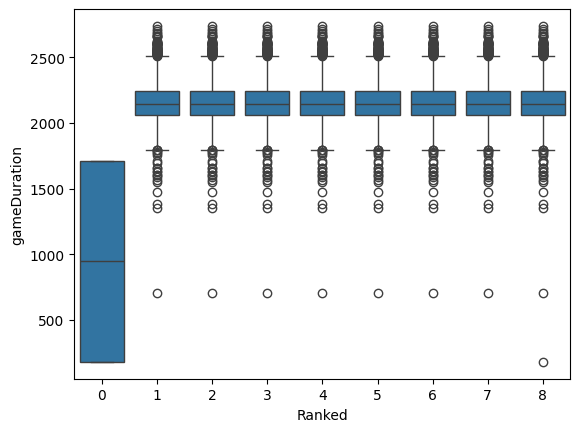

In [11]:
# boxplot의 x에는 범주형 데이터(Ranked), y에는 우리가 알고 싶은 것(gameDuration) 넣기
sns.boxplot(x=df['Ranked'], y=df['gameDuration'])
plt.show()

In [12]:
# Ranked가 0인 데이터 삭제
df = df[df['Ranked'] > 0]
df['Ranked'].value_counts()

8    10000
1     9998
3     9998
4     9998
5     9998
6     9998
7     9998
2     9997
Name: Ranked, dtype: int64

In [13]:
# gameDuration에서 게임이 튕기거나 했던 이상값들은 제거해야함
q1 = df['gameDuration'].quantile(0.25)
q3 = df['gameDuration'].quantile(0.75)
iqr = q3 - q1

over_out = q3 + (1.5 * iqr)
under_out = q1 - (1.5 * iqr)

# 불리언 인덱싱
df = df[(df['gameDuration'] > under_out) & (df['gameDuration'] < over_out)]

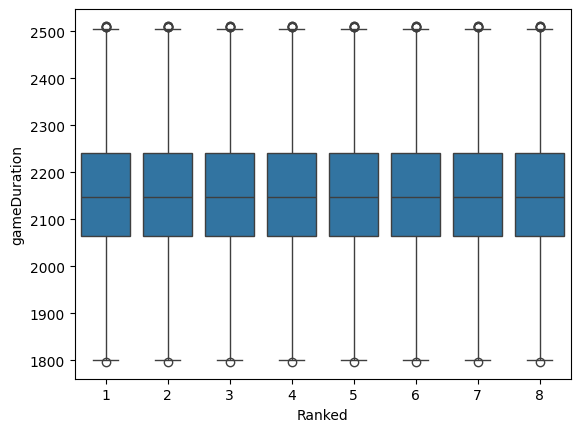

In [14]:
sns.boxplot(x=df['Ranked'], y=df['gameDuration'])
plt.show()

In [15]:
# 결정을 못내리겠으면 넣어도 보고 빼도 봐서 결정한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79271 entries, 0 to 79998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          79271 non-null  object 
 1   gameDuration    79271 non-null  float64
 2   level           79271 non-null  int64  
 3   lastRound       79271 non-null  int64  
 4   Ranked          79271 non-null  int64  
 5   ingameDuration  79271 non-null  float64
 6   combination     79271 non-null  object 
 7   champion        79271 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 5.4+ MB


In [16]:
# 레벨이 높으면 게임에서 그 만큼 오래 살았남았다는 의미이기 때문에
df['level'].value_counts()

8    45216
7    17407
9    12988
6     3086
5      539
4       35
Name: level, dtype: int64

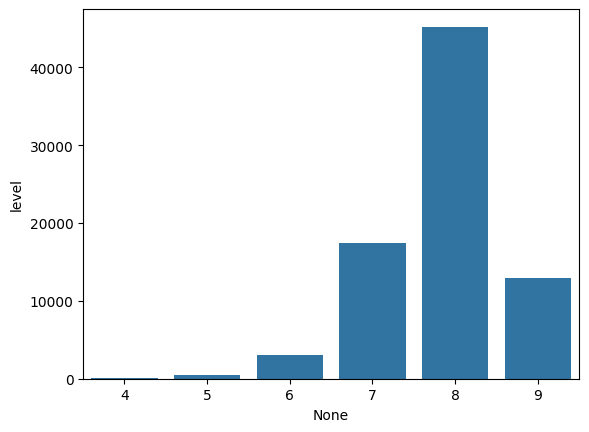

In [17]:
sns.barplot(x=df['level'].value_counts().index, y=df['level'].value_counts())
plt.show()

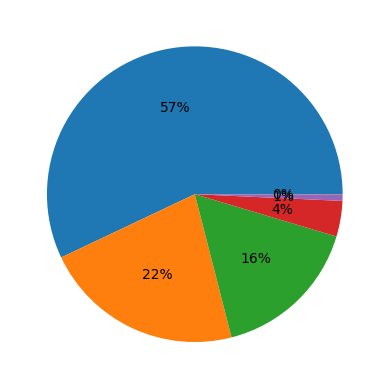

In [18]:
plt.pie(df['level'].value_counts(), autopct='%.f%%')
plt.show()

In [19]:
# 함수 선언 보다 람다식을 쓰는게 더 편하다.
df['label'] = df['Ranked'].apply(lambda x : 'win' if x < 5 else 'lose')

In [20]:
df

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,label
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",win
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais...",win
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",lose
...,...,...,...,...,...,...,...,...,...
79994,KR_4367610629,2171.343994,8,35,4,1931.437500,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 2, ...","{'TwistedFate': {'items': [], 'star': 3}, 'Pop...",win
79995,KR_4367610629,2171.343994,8,33,5,1815.786133,"{'Chrono': 1, 'DarkStar': 1, 'ManaReaver': 3, ...","{'Darius': {'items': [15, 39], 'star': 3}, 'Ra...",lose
79996,KR_4367610629,2171.343994,8,30,6,1658.850586,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'TwistedFate': {'items': [], 'star': 2}, 'Mal...",lose
79997,KR_4367610629,2171.343994,7,28,7,1562.578125,"{'Protector': 4, 'Rebel': 3, 'Set3_Blademaster...","{'Yasuo': {'items': [78], 'star': 3}, 'Sona': ...",lose


In [21]:
df['lastRound'].value_counts()

33    9585
34    9198
35    8386
37    8199
38    6992
31    6654
30    6028
40    5571
28    5542
27    3878
41    2726
26    2291
42    1105
24     926
23     504
44     366
21     334
20     178
17     103
19      96
13      89
12      74
45      72
39      56
14      54
16      51
25      42
36      41
18      36
22      29
15      22
32      22
29      13
47       6
11       2
Name: lastRound, dtype: int64

데이터 전처리

<ipython-input-22-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


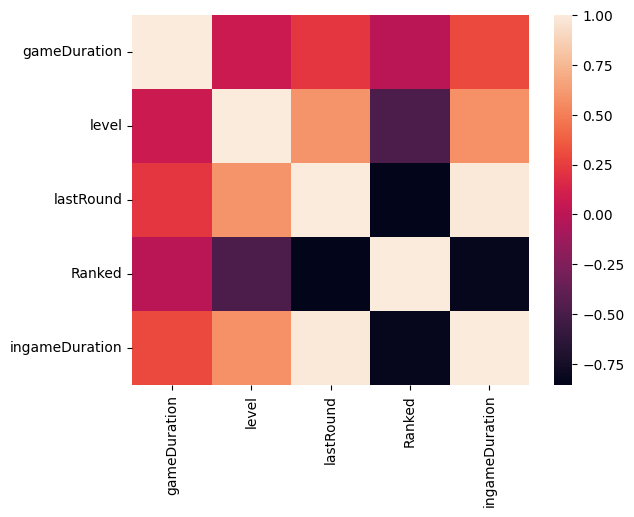

In [22]:
sns.heatmap(df.corr())
plt.show()

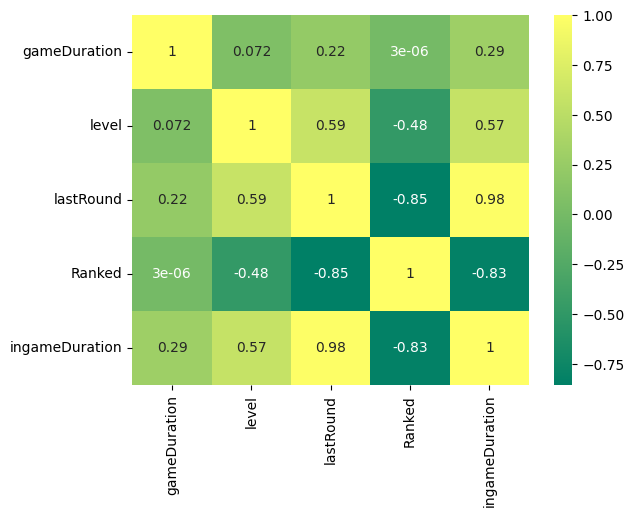

In [23]:
df[['lastRound','ingameDuration']].corr()

# 상관관계 분석
df_num = df.select_dtypes(exclude=['object'])
df_num.corr()
# heatmap으로 그리기
sns.heatmap(df_num.corr(), cmap='summer', annot=True)
plt.show()

In [24]:
df.columns

Index(['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked',
       'ingameDuration', 'combination', 'champion', 'label'],
      dtype='object')

In [25]:
# 데이터 전처리
# 삭제해야하는 칼럼
# gameId : 해당 변수는 게임 플레이어의 랭크를 결정하는데 사용되지 않음
# ingameDuration : lastRound하고 상관관계가 높고, rank를 결정하는데 직접적으로 영향을 줌

df_pre = df[['gameDuration', 'level', 'lastRound', 'Ranked',
             'combination', 'champion', 'label']]
df_pre.head()

,gameDuration,level,lastRound,Ranked,combination,champion,label
0,2233.449951,8,37,1,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",win
1,2233.449951,9,37,2,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
2,2233.449951,8,35,3,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
3,2233.449951,8,33,4,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais...",win
4,2233.449951,7,31,5,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",lose


In [26]:
df_pre['combination'][0]

"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'Set3_Celestial': 3, 'Set3_Mystic': 4, 'StarGuardian': 2}"

In [27]:
df_pre['champion'][0]

"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona': {'items': [46], 'star': 3}, 'Rakan': {'items': [37, 45], 'star': 3}, 'XinZhao': {'items': [25, 66, 13], 'star': 3}, 'Neeko': {'items': [], 'star': 2}, 'Karma': {'items': [], 'star': 2}, 'Soraka': {'items': [], 'star': 1}, 'Lulu': {'items': [99, 47, 55], 'star': 2}}"

In [28]:
# combination 데이터를 딕셔너리로 변경
import json

# df_pre의 combination을 json으로 변환 1
json.loads(df_pre['combination'][0].replace("'", "\""))

{'DarkStar': 2,
 'Protector': 4,
 'Rebel': 1,
 'Set3_Celestial': 3,
 'Set3_Mystic': 4,
 'StarGuardian': 2}

In [29]:
# df_pre의 combination을 json으로 변환 2
df_pre['combination'] = df_pre['combination'].apply(lambda x : json.loads(x.replace("'", "\"")))

<ipython-input-29-718d494a79b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['combination'] = df_pre['combination'].apply(lambda x : json.loads(x.replace("'", "\"")))


In [30]:
type(df_pre['combination'][0])

dict

In [31]:
df_pre['combination']

0        {'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...
1        {'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...
2        {'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...
3        {'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...
4        {'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...
                               ...                        
79994    {'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 2, ...
79995    {'Chrono': 1, 'DarkStar': 1, 'ManaReaver': 3, ...
79996    {'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...
79997    {'Protector': 4, 'Rebel': 3, 'Set3_Blademaster...
79998    {'Cybernetic': 1, 'DarkStar': 1, 'Demolitionis...
Name: combination, Length: 79271, dtype: object

In [32]:
# 각 칼럼으로 사용할 combination의 unique한 key값 추출
# unique한 값들이면 uniques에 넣을거임
uniques = []

def uni(x):
  for key in x.keys():
    if key not in uniques:
      uniques.append(key)

In [33]:
df_pre['combination'].apply(uni)

0        None
1        None
2        None
3        None
4        None
         ... 
79994    None
79995    None
79996    None
79997    None
79998    None
Name: combination, Length: 79271, dtype: object

In [34]:
uni(df_pre['combination'][3])
uniques

['DarkStar',
 'Protector',
 'Rebel',
 'Set3_Celestial',
 'Set3_Mystic',
 'StarGuardian',
 'Blaster',
 'Chrono',
 'Cybernetic',
 'Mercenary',
 'Set3_Blademaster',
 'Set3_Brawler',
 'Set3_Void',
 'Valkyrie',
 'Starship',
 'Infiltrator',
 'ManaReaver',
 'Sniper',
 'SpacePirate',
 'Vanguard',
 'Demolitionist',
 'MechPilot',
 'Set3_Sorcerer',
 'TemplateTrait']

In [35]:
uniques

['DarkStar',
 'Protector',
 'Rebel',
 'Set3_Celestial',
 'Set3_Mystic',
 'StarGuardian',
 'Blaster',
 'Chrono',
 'Cybernetic',
 'Mercenary',
 'Set3_Blademaster',
 'Set3_Brawler',
 'Set3_Void',
 'Valkyrie',
 'Starship',
 'Infiltrator',
 'ManaReaver',
 'Sniper',
 'SpacePirate',
 'Vanguard',
 'Demolitionist',
 'MechPilot',
 'Set3_Sorcerer',
 'TemplateTrait']

## 생성한 uniques를 사용해서 데이터 프레임 만들기

In [36]:
# 일단 칼럼부터 생성한다.
df = pd.DataFrame(columns=uniques)
df

,DarkStar,Protector,Rebel,Set3_Celestial,Set3_Mystic,StarGuardian,Blaster,Chrono,Cybernetic,Mercenary,...,Starship,Infiltrator,ManaReaver,Sniper,SpacePirate,Vanguard,Demolitionist,MechPilot,Set3_Sorcerer,TemplateTrait


In [37]:
## 빈리스트 생성
data = []

# 각 딕셔너리를 빈 리스트에 집어넣기
for dic in df_pre['combination']:
  data.append(dic)

df_combinations = pd.DataFrame(data, index=df_pre.index)
df_combinations

,DarkStar,Protector,Rebel,Set3_Celestial,Set3_Mystic,StarGuardian,Blaster,Chrono,Cybernetic,Mercenary,...,Starship,Infiltrator,ManaReaver,Sniper,SpacePirate,Vanguard,Demolitionist,MechPilot,Set3_Sorcerer,TemplateTrait
0,2.0,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.0,NaN,NaN,1.0,3.0,2.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,1.0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,4.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,2.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,1.0
79995,1.0,2.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,3.0,2.0,2.0,1.0,NaN,NaN,NaN,1.0
79996,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
79997,NaN,4.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_pre['combination'][5].keys

<function dict.keys>

In [39]:
df_combinations.loc[5,:]

DarkStar            NaN
Protector           NaN
Rebel               6.0
Set3_Celestial      NaN
Set3_Mystic         1.0
StarGuardian        NaN
Blaster             2.0
Chrono              NaN
Cybernetic          NaN
Mercenary           2.0
Set3_Blademaster    4.0
Set3_Brawler        NaN
Set3_Void           NaN
Valkyrie            2.0
Starship            1.0
Infiltrator         NaN
ManaReaver          NaN
Sniper              NaN
SpacePirate         1.0
Vanguard            NaN
Demolitionist       2.0
MechPilot           NaN
Set3_Sorcerer       NaN
TemplateTrait       1.0
Name: 5, dtype: float64

In [40]:
df_combinations.fillna(0, inplace=True)

In [41]:
df_combinations

,DarkStar,Protector,Rebel,Set3_Celestial,Set3_Mystic,StarGuardian,Blaster,Chrono,Cybernetic,Mercenary,...,Starship,Infiltrator,ManaReaver,Sniper,SpacePirate,Vanguard,Demolitionist,MechPilot,Set3_Sorcerer,TemplateTrait
0,2.0,4.0,1.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,1.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0
79995,1.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0
79996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
79997,0.0,4.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
js = json.loads(df_pre['champion'][0].replace("'", "\""))
js.values()

dict_values([{'items': [12], 'star': 3}, {'items': [46], 'star': 3}, {'items': [37, 45], 'star': 3}, {'items': [25, 66, 13], 'star': 3}, {'items': [], 'star': 2}, {'items': [], 'star': 2}, {'items': [], 'star': 1}, {'items': [99, 47, 55], 'star': 2}])

In [43]:
# json을 사용해서 딕셔너리로 만들기
df_pre['champion'] = df_pre['champion'].apply(lambda x : json.loads(x.replace("'", "\"")))

<ipython-input-43-b9278da9660f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['champion'] = df_pre['champion'].apply(lambda x : json.loads(x.replace("'", "\"")))


In [44]:
# 빈 리스트 생성 / 각 딕셔너리의 값을 data에 append
data = [dic for dic in df_pre['champion']]
data

# 해당 data를 데이터프레임으로 만들기
df_champions = pd.DataFrame(data, index=df_pre.index)
df_champions

,JarvanIV,Sona,Rakan,XinZhao,Neeko,Karma,Soraka,Lulu,Malphite,Blitzcrank,...,Kassadin,Fiora,Shen,Darius,TwistedFate,Zoe,Ahri,Syndra,VelKoz,Xerath
0,"{'items': [12], 'star': 3}","{'items': [46], 'star': 3}","{'items': [37, 45], 'star': 3}","{'items': [25, 66, 13], 'star': 3}","{'items': [], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 1}","{'items': [99, 47, 55], 'star': 2}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"{'items': [], 'star': 2}","{'items': [17], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 2}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'items': [], 'star': 2}","{'items': [], 'star': 2}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'items': [], 'star': 3}","{'items': [], 'star': 3}","{'items': [], 'star': 2}",NaN,"{'items': [39, 19, 19], 'star': 2}","{'items': [99, 25, 12], 'star': 1}"
79995,NaN,NaN,"{'items': [], 'star': 1}","{'items': [], 'star': 2}",NaN,NaN,NaN,NaN,NaN,NaN,...,"{'items': [], 'star': 1}",NaN,NaN,"{'items': [15, 39], 'star': 3}",NaN,NaN,NaN,NaN,NaN,NaN
79996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'items': [36, 67, 7], 'star': 2}","{'items': [], 'star': 2}",...,NaN,NaN,NaN,NaN,"{'items': [], 'star': 2}",NaN,NaN,NaN,"{'items': [39, 44], 'star': 2}",NaN
79997,NaN,"{'items': [46, 4], 'star': 3}","{'items': [37, 14], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 2}",NaN,"{'items': [], 'star': 1}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_champions.loc[0, 'JarvanIV']['star']

3

In [46]:
# null값 0으로 대체
df_champions.fillna(0, inplace=True)
df_champions

,JarvanIV,Sona,Rakan,XinZhao,Neeko,Karma,Soraka,Lulu,Malphite,Blitzcrank,...,Kassadin,Fiora,Shen,Darius,TwistedFate,Zoe,Ahri,Syndra,VelKoz,Xerath
0,"{'items': [12], 'star': 3}","{'items': [46], 'star': 3}","{'items': [37, 45], 'star': 3}","{'items': [25, 66, 13], 'star': 3}","{'items': [], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 1}","{'items': [99, 47, 55], 'star': 2}",0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,"{'items': [], 'star': 2}","{'items': [17], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 2}",...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,"{'items': [], 'star': 2}","{'items': [], 'star': 2}",...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"{'items': [], 'star': 3}","{'items': [], 'star': 3}","{'items': [], 'star': 2}",0,"{'items': [39, 19, 19], 'star': 2}","{'items': [99, 25, 12], 'star': 1}"
79995,0,0,"{'items': [], 'star': 1}","{'items': [], 'star': 2}",0,0,0,0,0,0,...,"{'items': [], 'star': 1}",0,0,"{'items': [15, 39], 'star': 3}",0,0,0,0,0,0
79996,0,0,0,0,0,0,0,0,"{'items': [36, 67, 7], 'star': 2}","{'items': [], 'star': 2}",...,0,0,0,0,"{'items': [], 'star': 2}",0,0,0,"{'items': [39, 44], 'star': 2}",0
79997,0,"{'items': [46, 4], 'star': 3}","{'items': [37, 14], 'star': 2}","{'items': [], 'star': 2}","{'items': [], 'star': 2}",0,"{'items': [], 'star': 1}",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# 해당 캐릭터가 몇 성인지에 대한 데이터 처리 함수 선언
x_data = df_champions.loc[2, 'JarvanIV']

def aaa(x):
  if type(x) == dict:
    return x['star']
  else:
    return x

aaa(x_data)

0

In [ ]:
# 모든 칼럼과 모든 행에 대해서 star함수를 적용

for col in df_champions.columns:
  df_champions[col] = df_champions[col].apply(lambda x : x['star'] if type(x) == dict else x)


In [ ]:
df_champions

,JarvanIV,Sona,Rakan,XinZhao,Neeko,Karma,Soraka,Lulu,Malphite,Blitzcrank,...,Kassadin,Fiora,Shen,Darius,TwistedFate,Zoe,Ahri,Syndra,VelKoz,Xerath
0,3,3,3,3,2,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,2,0,2,1
79995,0,0,1,2,0,0,0,0,0,0,...,1,0,0,3,0,0,0,0,0,0
79996,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,2,0,0,0,2,0
79997,0,3,2,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_champions.loc[1,:][df_champions.loc[2, :] > 0]

Malphite       2
Blitzcrank     2
Vi             1
Jinx           2
ChoGath        2
MissFortune    1
Ezreal         0
AurelionSol    0
Name: 1, dtype: int64

In [ ]:
df_pre.loc[7,'champion']

{'Graves': {'items': [], 'star': 1},
 'Leona': {'items': [2], 'star': 1},
 'Lucian': {'items': [2], 'star': 2},
 'Vi': {'items': [5], 'star': 2},
 'Jinx': {'items': [], 'star': 2},
 'Irelia': {'items': [44, 15, 49], 'star': 2}}

In [ ]:
## X데이터 중 gameDuration만 Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_pre['gameDuration'] = scaler.fit_transform(df_pre[['gameDuration']])

<ipython-input-49-dccdb5534023>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['gameDuration'] = scaler.fit_transform(df_pre[['gameDuration']])


In [ ]:
y = df_pre['Ranked']
X = pd.concat([df_pre.loc[:,:'lastRound'], df_combinations, df_champions], axis=1)

In [ ]:
# 승패 2진 분류 시에만 적용
df_pre['label'] = df_pre['Ranked'].apply(lambda x : 'win' if x<5 else 'lose')
df_pre

<ipython-input-59-2ed686701eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['label'] = df_pre['Ranked'].apply(lambda x : 'win' if x<5 else 'lose')


,gameDuration,level,lastRound,Ranked,combination,champion,label
0,0.611186,8,37,1,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",win
1,0.611186,9,37,2,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
2,0.611186,8,35,3,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",win
3,0.611186,8,33,4,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais...",win
4,0.611186,7,31,5,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",lose
...,...,...,...,...,...,...,...
79994,0.524375,8,35,4,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 2, ...","{'TwistedFate': {'items': [], 'star': 3}, 'Pop...",win
79995,0.524375,8,33,5,"{'Chrono': 1, 'DarkStar': 1, 'ManaReaver': 3, ...","{'Darius': {'items': [15, 39], 'star': 3}, 'Ra...",lose
79996,0.524375,8,30,6,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'TwistedFate': {'items': [], 'star': 2}, 'Mal...",lose
79997,0.524375,7,28,7,"{'Protector': 4, 'Rebel': 3, 'Set3_Blademaster...","{'Yasuo': {'items': [78], 'star': 3}, 'Sona': ...",lose


In [ ]:
# 승패 2진 분류 시에만 적용
y = df_pre['label']
X = pd.concat([df_pre.loc[:,:'lastRound'], df_combinations, df_champions], axis=1)

In [ ]:
X

,gameDuration,level,lastRound,DarkStar,Protector,Rebel,Set3_Celestial,Set3_Mystic,StarGuardian,Blaster,...,Kassadin,Fiora,Shen,Darius,TwistedFate,Zoe,Ahri,Syndra,VelKoz,Xerath
0,0.611186,8,37,2.0,4.0,1.0,3.0,4.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.611186,9,37,0.0,0.0,2.0,1.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0.611186,8,35,0.0,0.0,3.0,0.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0.611186,8,33,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.611186,7,31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,0.524375,8,35,2.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0,0,0,0,3,3,2,0,2,1
79995,0.524375,8,33,1.0,2.0,0.0,4.0,0.0,0.0,0.0,...,1,0,0,3,0,0,0,0,0,0
79996,0.524375,8,30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,2,0
79997,0.524375,7,28,0.0,4.0,3.0,2.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(47562, 79) (31709, 79)
(47562,) (31709,)


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier(n_neighbors=7)
lr = LogisticRegression(max_iter=100)
svc = SVC(gamma=0.2, C=0.3)
dtm = DecisionTreeClassifier(max_depth=5)

# 서포트 벡터 머신은 너무 오래 걸려서 뺐다.
voting_clf = VotingClassifier(estimators = [('KNN', knn), ('logistic', lr), ('DecesionTree', dtm)], voting='hard')

rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
## 모델 학습
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=7)),
                             ('logistic', LogisticRegression()),
                             ('DecesionTree',
                              DecisionTreeClassifier(max_depth=5))])

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
## 모델 평가
from sklearn.metrics import classification_report

In [ ]:
v_pred = voting_clf.predict(X_test)
voting_report = classification_report(y_test, v_pred)

r_pred = rfc.predict(X_test)
random_report = classification_report(y_test, r_pred)

print(voting_report)
print(random_report)

              precision    recall  f1-score   support

        lose       0.91      0.88      0.89     16030
         win       0.88      0.91      0.89     15679

    accuracy                           0.89     31709
   macro avg       0.89      0.89      0.89     31709
weighted avg       0.89      0.89      0.89     31709

              precision    recall  f1-score   support

        lose       0.90      0.88      0.89     16030
         win       0.88      0.90      0.89     15679

    accuracy                           0.89     31709
   macro avg       0.89      0.89      0.89     31709
weighted avg       0.89      0.89      0.89     31709

